In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import datetime as dt
from scipy import stats
from sklearn import preprocessing
import matplotlib as mpl
from scipy.stats import skew

## Plotting parameters
mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466

In [2]:
i = 2
pnwNP = pd.read_csv("../data/pnwNP_StatsLocations_SS.csv")
df = pd.read_csv('../data/pnwNP_modeledData/'+str(pnwNP['gage'][i])+".csv")
df['time'] = pd.to_datetime(df['time'])
df['water_year'] = df.time.dt.year.where(df.time.dt.month < 4, df.time.dt.year + 1)
df

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,water_year
0,0,0.767205,1950-01-01,12.308974,NaN,NaN,0.045307,10378500,1950
1,1,1.181407,1950-01-02,17.368828,NaN,NaN,0.042475,10378500,1950
2,2,1.245326,1950-01-03,15.873023,NaN,NaN,0.042475,10378500,1950
3,3,1.250622,1950-01-04,13.633054,NaN,NaN,0.045307,10378500,1950
4,4,1.247074,1950-01-05,11.714673,NaN,NaN,0.048139,10378500,1950
...,...,...,...,...,...,...,...,...,...
25928,25928,NaN,2020-12-27,NaN,NaN,0.720000,NaN,10378500,2021
25929,25929,NaN,2020-12-28,NaN,NaN,0.718333,NaN,10378500,2021
25930,25930,NaN,2020-12-29,NaN,NaN,0.710000,NaN,10378500,2021
25931,25931,NaN,2020-12-30,NaN,NaN,0.710000,NaN,10378500,2021


In [3]:
len(df['streamflow_NWIS']==0)

25933

In [4]:
pnwNPss = pd.read_csv("../data/StreamStats_GageStats/"+str(pnwNP['gage'][i])+".csv")
pnwNPss['value'] = pnwNPss['value'] * cfs_2_cms
pnwNPss.head()
# pnwNPss

,value,statName,statCode,statDesc,statisticErrors,yearsofRecord,comments
0,0.068527,7 Day 2 Year Low Flow,M7D2Y,7-Day mean low-flow that occurs on average onc...,[],46.0,NaN
1,0.023814,7 Day 10 Year Low Flow,M7D10Y,7-Day mean low-flow that occurs on average onc...,[],46.0,NaN
2,8.778222,1 Percent Duration,D1,Streamflow exceeded 1 percent of the time,[],46.0,Statistic Date Range 10/1/1910 - 9/30/1991
3,6.654459,2 Percent Duration,D2,Streamflow exceeded 2 percent of the time,[],46.0,Statistic Date Range 10/1/1910 - 9/30/1991
4,5.663369,3 Percent Duration,D3,Streamflow exceeded 3 percent of the time,[],46.0,Statistic Date Range 10/1/1910 - 9/30/1991


In [5]:
df['7Q10'] = df['streamflow_NWIS'].rolling(window=7).mean()
df

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,water_year,7Q10
0,0,0.767205,1950-01-01,12.308974,NaN,NaN,0.045307,10378500,1950,NaN
1,1,1.181407,1950-01-02,17.368828,NaN,NaN,0.042475,10378500,1950,NaN
2,2,1.245326,1950-01-03,15.873023,NaN,NaN,0.042475,10378500,1950,NaN
3,3,1.250622,1950-01-04,13.633054,NaN,NaN,0.045307,10378500,1950,NaN
4,4,1.247074,1950-01-05,11.714673,NaN,NaN,0.048139,10378500,1950,NaN
...,...,...,...,...,...,...,...,...,...,...
25928,25928,NaN,2020-12-27,NaN,NaN,0.720000,NaN,10378500,2021,NaN
25929,25929,NaN,2020-12-28,NaN,NaN,0.718333,NaN,10378500,2021,NaN
25930,25930,NaN,2020-12-29,NaN,NaN,0.710000,NaN,10378500,2021,NaN
25931,25931,NaN,2020-12-30,NaN,NaN,0.710000,NaN,10378500,2021,NaN


In [6]:
lf7q10 = df[['water_year','7Q10']]
lf7q10 = lf7q10.groupby(['water_year']).min()
lf7q10 = lf7q10[df['7Q10'].isnull().groupby(df['water_year']).sum() <= 36.6] ## makes sure that gage has at least 90% of year with data
# lf7q10
# lf7q10 = lf7q10.drop(['time','streamflow_NWM2d0'],axis=1)
# lf7q10 = lf7q10[lf7q10['7Q10']>0]
lf7q10

,7Q10
water_year,
1950,0.044498
1951,0.005663
1952,0.003641
1953,0.008091
1954,0.022653
1955,0.016181
1956,0.005259
1957,0.023058
1958,0.014158


In [7]:
lf7q10["RI"] = (1+len(lf7q10))/lf7q10['7Q10'].rank(method = "min")
lf7q10["ExcProb"] = 1/lf7q10["RI"]

In [8]:
lf7q10

,7Q10,RI,ExcProb
water_year,,,
1950,0.044498,1.048780,0.953488
1951,0.005663,3.909091,0.255814
1952,0.003641,14.333333,0.069767
1953,0.008091,2.150000,0.465116
1954,0.022653,1.228571,0.813953
1955,0.016181,1.433333,0.697674
1956,0.005259,8.600000,0.116279
1957,0.023058,1.194444,0.837209
1958,0.014158,1.535714,0.651163


In [9]:
#Measures of the distribution
Xbar = np.mean(np.log10(lf7q10['7Q10']))
S = np.std(np.log10(lf7q10['7Q10']))
g = skew(np.log10(lf7q10['7Q10']))

lf7q10["z"] = 4.91 * ((1 / lf7q10["RI"])**0.14 -(1 - 1 / lf7q10["RI"])**0.14)
lf7q10["K"] = (2/g) * ((((lf7q10["z"] - (g/6))*(g/6)+1)**3)-1)
# lf7q10["K"] = (2/g) * (((1 + (g/lf7q10["z"])/6-(g**2)/36)**3) - 1)
lf7q10["Qfit"] = 10**(Xbar + (lf7q10["K"] * S))

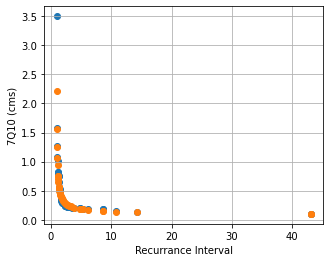

In [16]:
f,ax = plt.subplots(figsize=(5, 4))
plt.scatter(lf7q10["RI"],lf7q10['7Q10']/cfs_2_cms)
plt.scatter(lf7q10["RI"],lf7q10['Qfit']/cfs_2_cms)
ax.set_xlabel("Recurrance Interval")
ax.set_ylabel("7Q10 (cms)")
ax.grid()
# plt.show()
plt.savefig("../docs/PlushCreek_7q10.png",dpi = 300)


In [17]:
RetIntCalc = 10
z = 4.91 * ((1 / RetIntCalc)**0.14 -(1 - 1 / RetIntCalc)**0.14)
K = (2/g) * ((((z - (g/6))*(g/6)+1)**3)-1)
nwis_ri_stored = (10**(Xbar + (K * S)))
nwis_ri_stored/cfs_2_cms

0.1429175503611929

### Scratch space

In [3]:
import dataretrieval as nwis

startDate = "1910-09-30"
endDate = "2020-12-31"

tt = nwis.get_dv(sites=str(pnwNP['gage'][i]),
                 start = startDate,
                 end = endDate)[0]

ModuleNotFoundError: ignored

In [ ]:
tt[tt["00060_Mean"]<0.5]

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
1949-10-01 00:00:00+00:00,0.20,A,10378500
1949-10-02 00:00:00+00:00,0.20,A,10378500
1949-10-03 00:00:00+00:00,0.20,A,10378500
1949-10-04 00:00:00+00:00,0.30,A,10378500
1949-10-05 00:00:00+00:00,0.30,A,10378500
...,...,...,...
1991-09-26 00:00:00+00:00,0.31,"A, e",10378500
1991-09-27 00:00:00+00:00,0.30,"A, e",10378500
1991-09-28 00:00:00+00:00,0.28,"A, e",10378500


In [ ]:
#Measures of the distribution
Xbar = np.mean(np.log10(tt['7Q10']))
S = np.std(np.log10(tt['7Q10']))
g = skew(np.log10(tt['7Q10']))

tt["z"] = 4.91 * ((1 / tt["RI"])**0.14 -(1 - 1 / tt["RI"])**0.14)
tt["K"] = (2/g) * ((((tt["z"] - (g/6))*(g/6)+1)**3)-1)
tt["Qfit"] = 10**(Xbar + (tt["K"] * S))

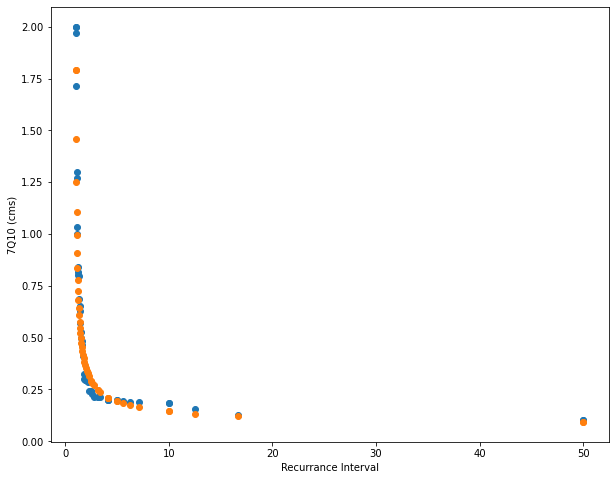

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
plt.scatter(tt["RI"],tt['7Q10'])
plt.scatter(tt["RI"],tt['Qfit'])
ax.set_xlabel("Recurrance Interval")
ax.set_ylabel("7Q10 (cms)")
plt.show()



In [ ]:
RetIntCalc = 10
z = 4.91 * ((1 / RetIntCalc)**0.14 -(1 - 1 / RetIntCalc)**0.14)
K = (2/g) * ((((z - (g/6))*(g/6)+1)**3)-1)
# K = (2/g) * ((((1 + (g/z))/6-((g**2)/36))**3) - 1)
# PearsonQY= np.exp(Xbar + (K * S))
nwis_ri = (10**(Xbar + (K * S)))
nwis_ri

0.14416573881975353

In [ ]:
7 * cfs_2_cms

0.1982179262

In [ ]:
DA = 168
P = 8
1.5860933813337*(10**-5.1445)*(DA**1.0707)*(P**2.7070)

0.7640679722698828

In [ ]:
0.004/cfs_2_cms

0.14125866684604635

In [ ]:
0.841 *cfs_2_cms

0.0238144679906